<a href="https://colab.research.google.com/github/KarbivnychyiVolodymyr/machine_learning/blob/main/%D0%9A%D0%B0%D1%80%D0%B1%D1%96%D0%B2%D0%BD%D0%B8%D1%87%D0%B8%D0%B9_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.

In [ ]:
# 1. Завантаження датасету та виведення перших 5 рядків
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантажуємо датасет Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Виведемо перші 5 рядків
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


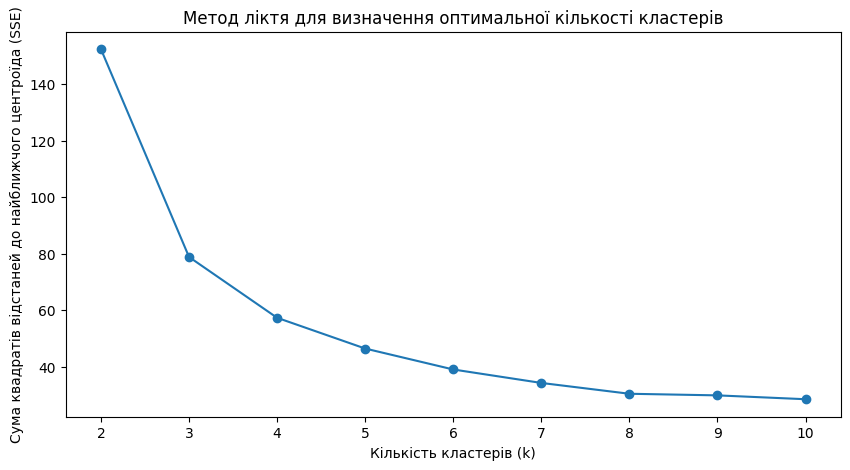

In [ ]:
# 2. Метод ліктя та метод силуетів
sse = []  # Сума квадратів відстаней
silhouette_scores = []  # Оцінки силуетів
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

    # Розрахуємо середній силует для кожної кількості кластерів
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# 3. Візуалізація методу ліктя
plt.figure(figsize=(10,5))
plt.plot(k_range, sse, marker='o')
plt.title("Метод ліктя для визначення оптимальної кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Сума квадратів відстаней до найближчого центроїда (SSE)")
plt.show()

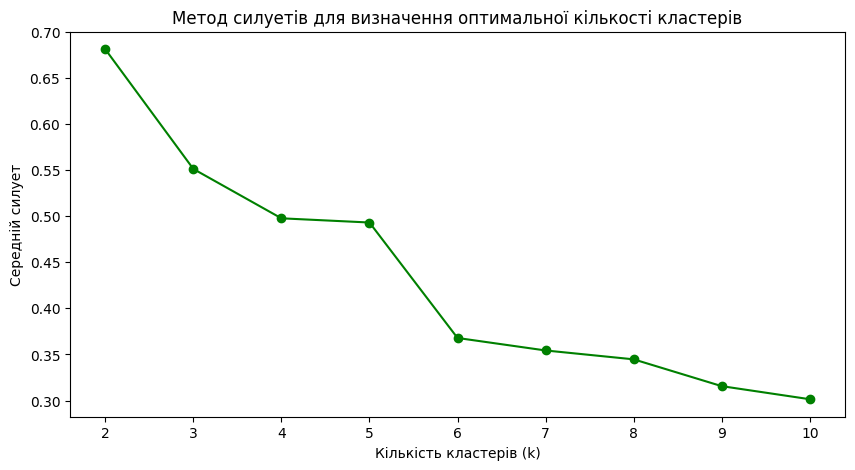

In [ ]:
# 4. Візуалізація методу силуетів
plt.figure(figsize=(10,5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Метод силуетів для визначення оптимальної кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Середній силует")
plt.show()

In [ ]:
# 5. Візуалізація кластерів для 3 кластерів (оптимальне значення)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Візуалізуємо кластери за допомогою двох головних компонент
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.iloc[:, :-1]), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

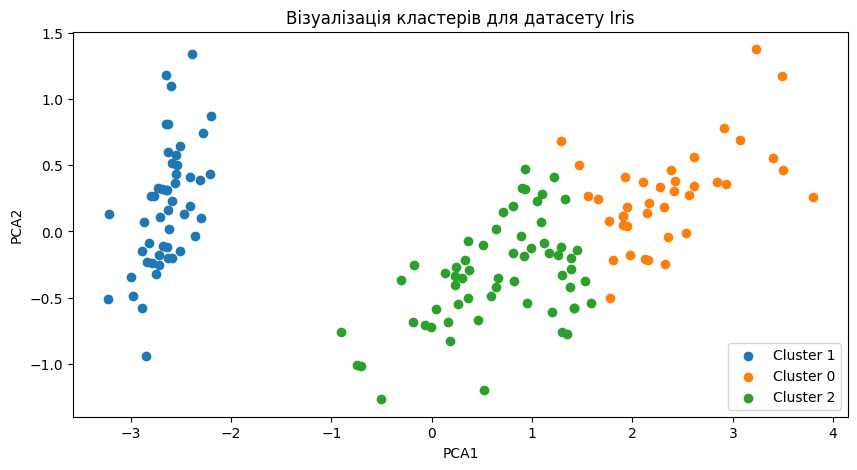

In [ ]:
# Побудуємо графік кластерів
plt.figure(figsize=(10,5))
for cluster in df_pca['Cluster'].unique():
    clustered_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'], label=f'Cluster {cluster}')

plt.title("Візуалізація кластерів для датасету Iris")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

У результаті аналізу датасету Ірис за допомогою методів кластеризації було визначено оптимальну кількість кластерів, яка дорівнює трьом. Це підтвердилося як методом ліктя, що показав значне зменшення суми квадратів відстаней після трьох кластерів, так і методом силуетів, де середній коефіцієнт силуета був максимальним для трьох кластерів. Візуалізація кластерів за допомогою PCA також продемонструвала чітке розділення даних на три групи, що відповідає відомим підгрупам видів ірису. Це свідчить про ефективність кластеризації та можливість використання її для подібних задач.

In [7]:
'''Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

df.head(5)


Mounted at /content/drive


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
'''Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем. Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.'''

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

# Виведемо розмір датасету та типи даних
print(df.shape)
print(df.info())

# Перевіримо на пропущені значення
missing_values = df.isnull().sum()
print("Пропущені значення:\n", missing_values)

# Заповнимо пропущені значення середнім за стовпцем
df.fillna(df.mean(), inplace=True)

# Перевіримо на дублікати
duplicates = df.duplicated().sum()
print("Кількість дублікатів:", duplicates)

# Видалимо дублікати, якщо є
df.drop_duplicates(inplace=True)

# Виведемо описову статистику
print(df.describe())

(2392, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
Пропущен

In [10]:
'''Вирішуємо задачу класифікації. Побудувати 3
моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.
Визначити методом ліктя і силуєтів оптимальну кількість кластерів.
Візуалізувати кластери.'''
from sklearn.preprocessing import StandardScaler
# Вибір ознак (X) та міток (y)
X = df.drop(['GradeClass', 'StudentID'], axis=1)
y = df['GradeClass']

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальні і тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Налаштування гіперпараметрів для Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
}

# Модель Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Найкращі параметри та оцінка точності
print("Найкращі параметри Random Forest:", grid_rf.best_params_)
print("Точність Random Forest:", grid_rf.score(X_test, y_test))


Найкращі параметри Random Forest: {'max_depth': 10, 'n_estimators': 100}
Точність Random Forest: 0.9122562674094707


In [12]:
from sklearn.linear_model import LogisticRegression

# Налаштування гіперпараметрів для Логістичної регресії
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
}

# Модель Логістичної регресії
lr = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Найкращі параметри та оцінка точності
print("Найкращі параметри Logistic Regression:", grid_lr.best_params_)
print("Точність Logistic Regression:", grid_lr.score(X_test, y_test))


Найкращі параметри Logistic Regression: {'C': 10, 'penalty': 'l2'}
Точність Logistic Regression: 0.7520891364902507


In [13]:
from sklearn.svm import SVC

# Налаштування гіперпараметрів для SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Модель SVM
svm = SVC(random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Найкращі параметри та оцінка точності
print("Найкращі параметри SVM:", grid_svm.best_params_)
print("Точність SVM:", grid_svm.score(X_test, y_test))


Найкращі параметри SVM: {'C': 10, 'kernel': 'linear'}
Точність SVM: 0.8467966573816156


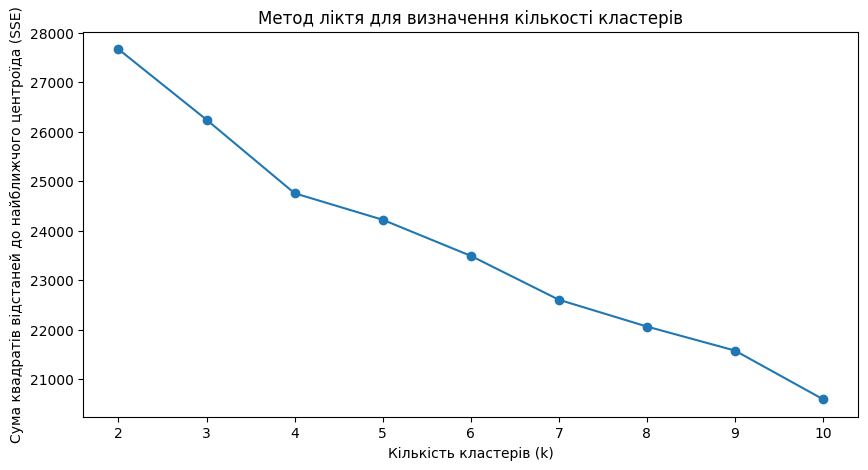

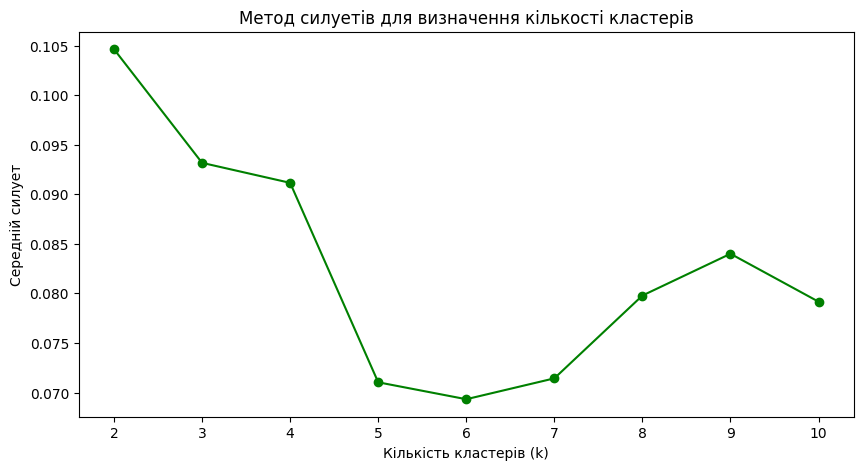

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Визначення оптимальної кількості кластерів за методом ліктя та силуетів
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

    # Оцінка за силуетами
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Візуалізація методу ліктя
plt.figure(figsize=(10,5))
plt.plot(k_range, sse, marker='o')
plt.title("Метод ліктя для визначення кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Сума квадратів відстаней до найближчого центроїда (SSE)")
plt.show()

# Візуалізація методу силуетів
plt.figure(figsize=(10,5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Метод силуетів для визначення кількості кластерів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Середній силует")
plt.show()


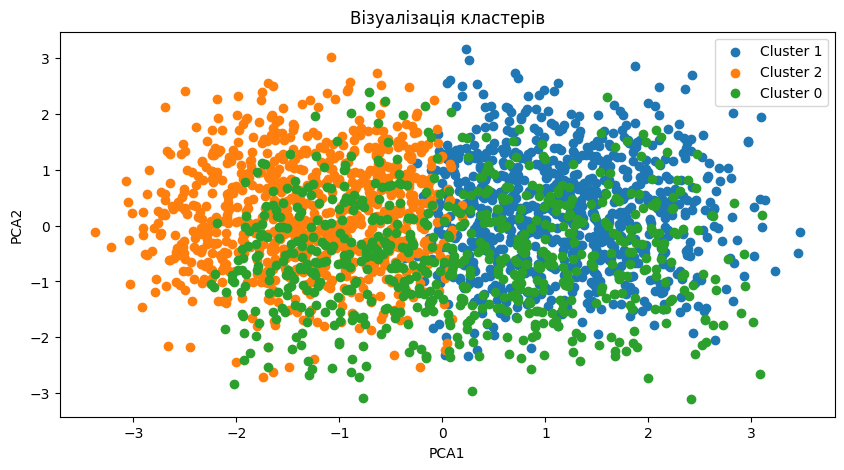

In [15]:
# Побудова та візуалізація кластерів з оптимальною кількістю (припустимо 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA

# Використаємо PCA для візуалізації
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Візуалізація кластерів
plt.figure(figsize=(10,5))
for cluster in df_pca['Cluster'].unique():
    clustered_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'], label=f'Cluster {cluster}')

plt.title("Візуалізація кластерів")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


Random Forest показала найвищу точність серед трьох моделей – 91.23%. Оптимальні параметри: глибина дерев (max_depth) = 10 та кількість дерев у лісі (n_estimators) = 100. Це свідчить про те, що ця модель здатна найкраще впоратися з поставленою задачею класифікації на даних.

Логістична регресія мала точність 75.21% з параметрами регуляризації C = 10 та штрафом l2. Ця модель працює гірше, оскільки може бути менш підходящою для складних патернів у даних.

SVM (Support Vector Machine) з лінійним ядром продемонструвала точність 84.68%, що є середнім результатом. Оптимальний параметр регуляризації C = 10, а ядро було вибрано як лінійне. Це свідчить про те, що для цієї задачі класифікації SVM може бути досить хорошим варіантом, але поступається Random Forest.